## Final Project Submission

Please fill out:
* Student name: Vincent Barchok Ngochoch
* Student pace: Full time
* Instructor name: Samuel karu



# Project Title

## Overview
For this project, we will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

## 1. Introduction
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## 1.2 Business Problems to Explore:
Find the below four key business problems that the analysis aims to address.


1.   **Evaluating Aircraft Safety Based on Make and Model**

How does the make and model of an aircraft correlate with the frequency of aviation accidents? Understanding this relationship will provide insights into the safest aircraft models, aiding in more informed acquisition decisions.


2.  **Assessing Accident Risk by Flight Purpose**

What is the distribution of aviation accidents across different flight purposes (e.g., commercial, cargo, private, training)? Identifying high-risk flight purposes will help guide strategic decisions on aircraft procurement and operational planning.


3.  **Geographical Analysis of Aviation Accidents in the U.S.A**

How do aviation accident rates vary across different states in the United States? Analyzing regional accident trends can inform route planning and investment decisions to maximize operational safety and profitability.


4.  **Seasonal Impact on Aviation Accidents and Revenue Optimization**

How do different weather seasons correlate with the number of aviation accidents? Understanding these patterns will help identify safer operational periods and optimize revenue by strategically planning flight schedules.



## 2. Data Description
In the data folder is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In [1]:
import pandas as pd
import numpy as np

df_original=pd.read_csv("./data/AviationData.csv", encoding="ISO-8859-1")
df_original

C:\Users\USER PC\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
#To keep the original data frame intact, I will proceed to create a copy for further cleaning and analysis

df = df_original.copy()

In [3]:
#Lets progress to get more information on the columns, rows and data types for the aviation data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
#lets now explore the shape of the data sets i.e rows and columns 
rows, cols = df.shape
(f"The dataset contains {rows} rows and {cols} columns.")


'The dataset contains 88889 rows and 31 columns.'

In [5]:
#this  provides a statistical summary of the numerical columns in the DataFrame.
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
#returns the first five rows of a DataFrame, helping you quickly inspect the dataset
df.head(
)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
#returns the last five rows of a DataFrame
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [8]:
#this gives the name descrption of the various columns in the data set:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
#checking the missing values;
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i


## 3. Data Cleaning
lets perform data cleaning on the data set to understand more


In [10]:
#Data Cleaning 
#the df.info() provides a concise summary of a Pandas DataFrame, including:  Number of entries (rows) and columns,
#Column names and data types, 
#Non-null value counts per column and Memory usage of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [11]:
#checking missing values
df.isna().sum()
#from this data set its evident that we do have several columns with alot of missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [12]:
#dropping columns with alot of missing values
#I will proceed to drop several columns with my criteria being those with over 30% of the missing values
#i will rename the df to df_clean for purpose of clear tracking:

columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Broad.phase.of.flight']

df_clean = df.drop(columns=columns_to_drop)



In [13]:
#I will also drop columns which are not relevant for my findings.
more_columns_to_drop = ['Event.Id','Accident.Number', 'Registration.Number', 'Amateur.Built', 
                   'Publication.Date', 'Publication.Date', 'Report.Status','Engine.Type']
df_clean = df_clean.drop(columns=more_columns_to_drop)




In [14]:
#confirm that the relevant columns have been updated accordingly
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Purpose.of.flight       82697 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Total.Minor.Injuries    76956 non-null  float64
 13  Total.Uninjured         82977 non-null  float64
 14  Weather.Condition       84397 non-null

In [15]:
#confirm that the relevant columns have been updated accordingly
df_clean.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition'],
      dtype='object')

In [16]:
#NEW COLUMNS NAMES for ease of understanding
new_column_names = {'Investigation.Type': 'Type', 'Event.Date':'Date', 'Injury.Severity':'Injury_Severity', 
                    'Aircraft.damage':'Aircraft_damage', 'Number.of.Engines':'Engines', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df_clean.rename(columns=new_column_names, inplace=True)


In [17]:
#display the top 5 rows with additional changes to reflect changes in the names
df_clean.head()

,Type,Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Engines,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC


While deep diving through the data i realized that columns 'Injury_Severity' and 'Fatal_Injuries' provide similar information but 'Fatal_Injuries' has many missing data. using  data from these two columns, I create a new column named "Fatality" 

In [18]:
#Relevant code is as below

df_clean['Fatality'] = df_clean['Injury_Severity'].str.extract(r'\((\d+)\)')
df_clean['Fatality'].fillna(df_clean['Injury_Severity'], inplace=True)
df_clean['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0}, inplace=True)
df_clean['Fatality'] = df_clean.apply(lambda row: row['Fatal_Injuries'] if row['Fatality'] == 'Fatal' else row['Fatality'], axis=1)
df_clean['Fatality'].replace('Unavailable', np.nan, inplace=True)
df_clean['Fatality'][~df_clean['Fatality'].isna()] = df_clean['Fatality'][~df_clean['Fatality'].isna()].astype(int)
pd.options.display.float_format = '{:.0f}'.format

<ipython-input-18-505b52a75a0d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatality'][~df_clean['Fatality'].isna()] = df_clean['Fatality'][~df_clean['Fatality'].isna()].astype(int)


In [19]:
# we proceed to drop Fatal injuries and  injury_Severity column as its no longer relevant:

#df_clean.drop(columns=['Fatal_Injuries',],inplace=True)
df_clean.drop(columns=['Injury_Severity'],inplace=True)

In [20]:
#Lets now obtain information on new updated column sections:
df_clean.head()

,Type,Date,Location,Country,Aircraft_damage,Make,Model,Engines,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Fatality
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1,Personal,2,0,0,0,UNK,2
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1,Personal,4,0,0,0,UNK,4
2,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,1,Personal,3,nan,nan,nan,IMC,3
3,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1,Personal,2,0,0,0,IMC,2
4,Accident,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,nan,Personal,1,2,nan,0,VMC,1


In [21]:
# To enable us answer our problem statement question of the relationship between seasons and accidents
#then it will be important if we change "Date column" to seasons and months.
#As guided below:

df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%Y-%m-%d')
df_clean['Month'] = df_clean['Date'].dt.month
seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

df_clean['Season'] = df_clean['Month'].map(seasons)

In [22]:
#Lets further use the above information to create years column:

df_clean['Year'] = df_clean['Date'].dt.year


In [23]:
#Lets know explore our new data as at this point:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Type              88889 non-null  object        
 1   Date              88889 non-null  datetime64[ns]
 2   Location          88837 non-null  object        
 3   Country           88663 non-null  object        
 4   Aircraft_damage   85695 non-null  object        
 5   Make              88826 non-null  object        
 6   Model             88797 non-null  object        
 7   Engines           82805 non-null  float64       
 8   Flight_Purpose    82697 non-null  object        
 9   Fatal_Injuries    77488 non-null  float64       
 10  Serious_Injuries  76379 non-null  float64       
 11  Minor_Injuries    76956 non-null  float64       
 12  Uninjured         82977 non-null  float64       
 13  Weather           84397 non-null  object        
 14  Fatality          8779

In [24]:
#lets look at the null values and make appropriate decision 
df_clean.isna().sum()
#From the dataset, the columns with missing values are location,Country,Aircraft_Damage,Make,Model
#continuation Engines,Flight_purpose, Serious_Injuries,Minor_Injuries,Uninjured,Weather and Fatality



Type                    0
Date                    0
Location               52
Country               226
Aircraft_damage      3194
Make                   63
Model                  92
Engines              6084
Flight_Purpose       6192
Fatal_Injuries      11401
Serious_Injuries    12510
Minor_Injuries      11933
Uninjured            5912
Weather              4492
Fatality             1096
Month                   0
Season                  0
Year                    0
dtype: int64

In [25]:
# lets clean the missing values
df_clean['Fatal_Injuries'].fillna(df_clean['Fatal_Injuries'].median(), inplace=True)
df_clean['Serious_Injuries'].fillna(df_clean['Serious_Injuries'].median(), inplace=True)
df_clean['Minor_Injuries'].fillna(df_clean['Minor_Injuries'].median(), inplace=True)
df_clean['Uninjured'].fillna(df_clean['Uninjured'].median(), inplace=True)
df_clean['Engines'].fillna(df_clean['Engines'].median(), inplace=True)
df_clean['Location'].fillna('Unknown', inplace=True)
df_clean['Country'].fillna('Unknown', inplace=True)
df_clean['Aircraft_damage'].fillna('Unknown', inplace=True)
df_clean['Make'].fillna('Unknown', inplace=True)
df_clean['Model'].fillna('Unknown', inplace=True)
df_clean['Flight_Purpose'].fillna('Unknown', inplace=True)
df_clean['Weather'].fillna('Unknown', inplace=True)
df_clean['Fatality'].fillna(0, inplace=True)
# Check again for missing values
df_clean.isna().sum()
#this confirms that we no longer have null values

Type                0
Date                0
Location            0
Country             0
Aircraft_damage     0
Make                0
Model               0
Engines             0
Flight_Purpose      0
Fatal_Injuries      0
Serious_Injuries    0
Minor_Injuries      0
Uninjured           0
Weather             0
Fatality            0
Month               0
Season              0
Year                0
dtype: int64

In [26]:
#We can further reconfirm  that we do not have null values using .inf0()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Type              88889 non-null  object        
 1   Date              88889 non-null  datetime64[ns]
 2   Location          88889 non-null  object        
 3   Country           88889 non-null  object        
 4   Aircraft_damage   88889 non-null  object        
 5   Make              88889 non-null  object        
 6   Model             88889 non-null  object        
 7   Engines           88889 non-null  float64       
 8   Flight_Purpose    88889 non-null  object        
 9   Fatal_Injuries    88889 non-null  float64       
 10  Serious_Injuries  88889 non-null  float64       
 11  Minor_Injuries    88889 non-null  float64       
 12  Uninjured         88889 non-null  float64       
 13  Weather           88889 non-null  object        
 14  Fatality          8888

In [27]:
#Further information on which countries are relevant for this data set

df_clean['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Cambodia              1
Seychelles            1
Ivory Coast           1
Yemen                 1
Chad                  1
Name: Country, Length: 219, dtype: int64

In [28]:
# we note that USA is highly represented in this data set at circa 97.83%. 
#Based on this it will make sense to have a dataframe for USA as the dat is more reflective of this country.

df_us = df_us = df_clean[df_clean['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)
df_us = df_us.copy()
df_us.info()
# the data  below confirms that USA country data frome accounts to 93% of the entire data and it make more sense to use this 
# Country Data Set for further analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82248 entries, 0 to 82247
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Type              82248 non-null  object        
 1   Date              82248 non-null  datetime64[ns]
 2   Location          82248 non-null  object        
 3   Country           82248 non-null  object        
 4   Aircraft_damage   82248 non-null  object        
 5   Make              82248 non-null  object        
 6   Model             82248 non-null  object        
 7   Engines           82248 non-null  float64       
 8   Flight_Purpose    82248 non-null  object        
 9   Fatal_Injuries    82248 non-null  float64       
 10  Serious_Injuries  82248 non-null  float64       
 11  Minor_Injuries    82248 non-null  float64       
 12  Uninjured         82248 non-null  float64       
 13  Weather           82248 non-null  object        
 14  Fatality          8224

In [29]:
# I create new columns using states in USA to provide insight on the problem statement
#in regards to relationship between the various states and the Number of accidents
#As well as further Visualizations

valid_state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in valid_state_codes:
            return location[:-3].strip(), last_two_chars
        else:
            return location, "Not Applicable" # Some accidents have not happend in a particular state
    else:
        return np.nan, np.nan

df_us[['City', 'State']] = df_us['Location'].apply(extract_city_state).apply(pd.Series)

In [30]:
#removing comas
df_us['City'] = df_us['City'].str.rstrip(',')

In [31]:
#confirming position of the new data frame to be specific USA data frame
df_us.head()

,Type,Date,Location,Country,Aircraft_damage,Make,Model,Engines,Flight_Purpose,Fatal_Injuries,Serious_Injuries,Minor_Injuries,Uninjured,Weather,Fatality,Month,Season,Year,City,State
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1,Personal,2,0,0,0,UNK,2,10,Fall,1948,MOOSE CREEK,ID
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1,Personal,4,0,0,0,UNK,4,7,Summer,1962,BRIDGEPORT,CA
2,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,1,Personal,3,0,0,1,IMC,3,8,Summer,1974,Saltville,VA
3,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1,Personal,2,0,0,0,IMC,2,6,Summer,1977,EUREKA,CA
4,Accident,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,1,Personal,1,2,0,0,VMC,1,8,Summer,1979,Canton,OH


## 4. Data Exploration and Visualization
Perform exploratory data analysis (EDA) and visualization to understand the dataset.

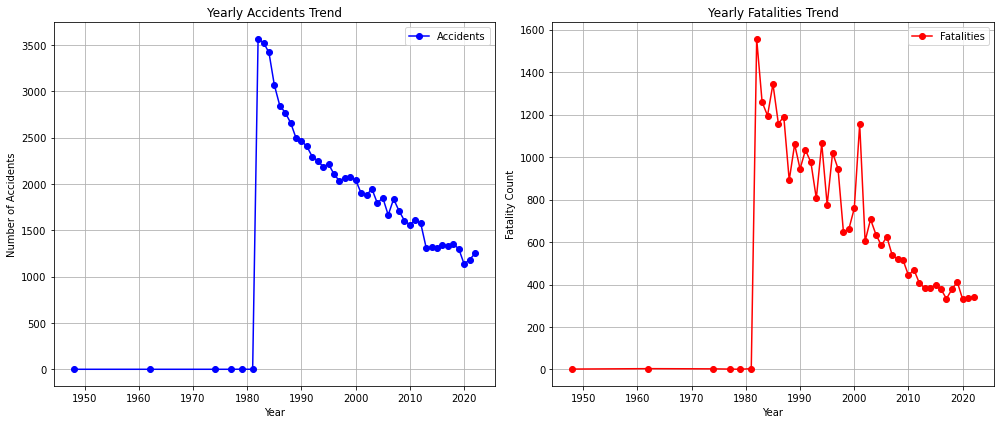

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm 

# We will  plot a line graph demonstrating the relationship between:
#1.the number of accidents Against years for THe USA Data Set
#.The fatalities against years for the same data set.

# Filter data for years before 2023
df_us_filtered = df_us[df_us['Year'] < 2023]

# Group accidents by year
accidents_by_year = df_us_filtered['Year'].value_counts().sort_index()

# Group fatalities by year
fatalities_by_year = df_us_filtered.groupby('Year')['Fatality'].sum()

# Extract years and values for accidents
years_accidents = accidents_by_year.index
accidents = accidents_by_year.values

# Extract years and values for fatalities
years_fatalities = fatalities_by_year.index
fatalities = fatalities_by_year.values

# Create figure with 2 side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Yearly Accidents Trend (Left)
axes[0].plot(years_accidents, accidents, marker='o', linestyle='-', color='blue', label="Accidents")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of Accidents")
axes[0].set_title("Yearly Accidents Trend")
axes[0].legend()
axes[0].grid(True)

# Plot Yearly Fatalities Trend (Right)
axes[1].plot(years_fatalities, fatalities, marker='o', linestyle='-', color='red', label="Fatalities")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Fatality Count")
axes[1].set_title("Yearly Fatalities Trend")
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


#Comments
#1.From the graph below its evident that there were no avaition accidents and Fatalities prior to 1981
#2.Most Accidents happened in the year 1982 with circa 3550 Accidents and most fatalities happend in the same period at 1580
#3. From Year 2002 onwards the number of Accidents and fatalities hve been steadily reducing untill year 2022, I would attribute these
#to improved security technologies and innovations

In [33]:
# lets try to find out the relationship between Makes, Models and engine types with accidents
make_model_accident_counts = df_us.groupby(['Make', 'Model']).size().reset_index(name='AccidentCount', drop=False)
make_model_accident_counts = make_model_accident_counts.sort_values(by='AccidentCount', ascending=False)
make_model_accident_counts

,Make,Model,AccidentCount
5099,Cessna,152,2149
5121,Cessna,172,1225
5164,Cessna,172N,980
13950,Piper,PA-28-140,798
5074,Cessna,150,709
...,...,...,...
7806,FISHER,CELEBRITY,1
7807,FISHER,HP-14 SAILPLANE,1
7808,FISHER,Lancair,1
7809,FISHER,RV-7A,1


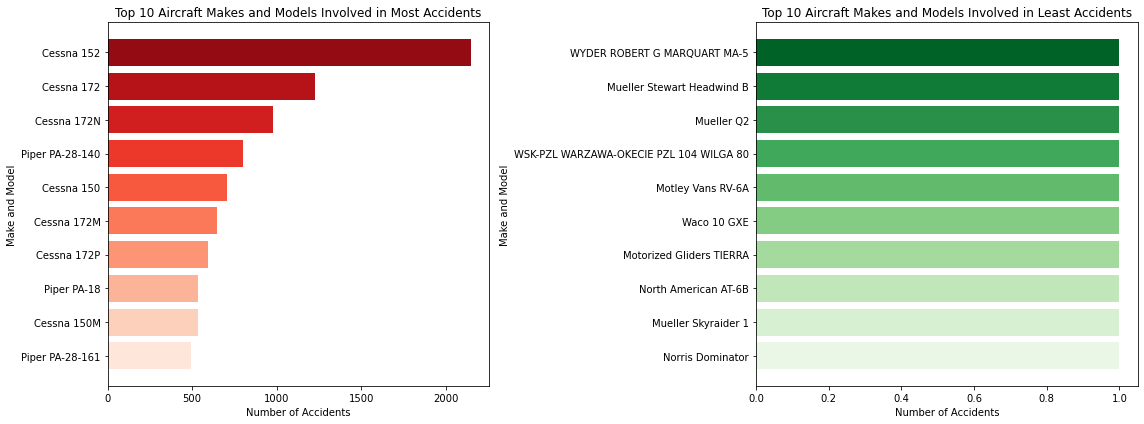

In [34]:
# We wil Deep dive through our First problem statement I.E

(""'**Evaluating Aircraft Safety Based on Make and Model**""')

#We will plot a bar graph of the relationship between:
#1. the Number of Accident against Make and Model of The Aircraft
#2. the Number of Fatalities against Make and Model of The Aircraft

#We will focus on top 10 Aircrafts

# Get the top 10 aircraft makes and models with the most accidents
top_10_most_accidents = make_model_accident_counts.nlargest(10, 'AccidentCount')

# Get the top 10 aircraft makes and models with the least accidents
top_10_least_accidents = make_model_accident_counts.nsmallest(10, 'AccidentCount')

# Create figure with 2 side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Most Accidents by Aircraft Make and Model (Left)
colors_most = sns.color_palette("Reds_r", len(top_10_most_accidents))
axes[0].barh(top_10_most_accidents['Make'] + ' ' + top_10_most_accidents['Model'], 
             top_10_most_accidents['AccidentCount'], color=colors_most)
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Make and Model')
axes[0].set_title('Top 10 Aircraft Makes and Models Involved in Most Accidents')
axes[0].invert_yaxis()

# Plot Least Accidents by Aircraft Make and Model (Right)
colors_least = sns.color_palette("Greens_r", len(top_10_least_accidents))
axes[1].barh(top_10_least_accidents['Make'] + ' ' + top_10_least_accidents['Model'], 
             top_10_least_accidents['AccidentCount'], color=colors_least)
axes[1].set_xlabel('Number of Accidents')
axes[1].set_ylabel('Make and Model')
axes[1].set_title('Top 10 Aircraft Makes and Models Involved in Least Accidents')
axes[1].invert_yaxis()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Comments:
#1. Cessna make account to Majority of the Accidents at Circa 2,200 Accidents recorded.
#2. Cessna152, Cessna172, Cessna172N involved in most of the accidents
#3. Cessna Models dominate accidents charts alluding to the fact that Cessna Make and Model is responsible for Majority
#of the Accidents
#4. Md Helicopter, Piccard and Money M-20k are the among the most safest Aircrafts

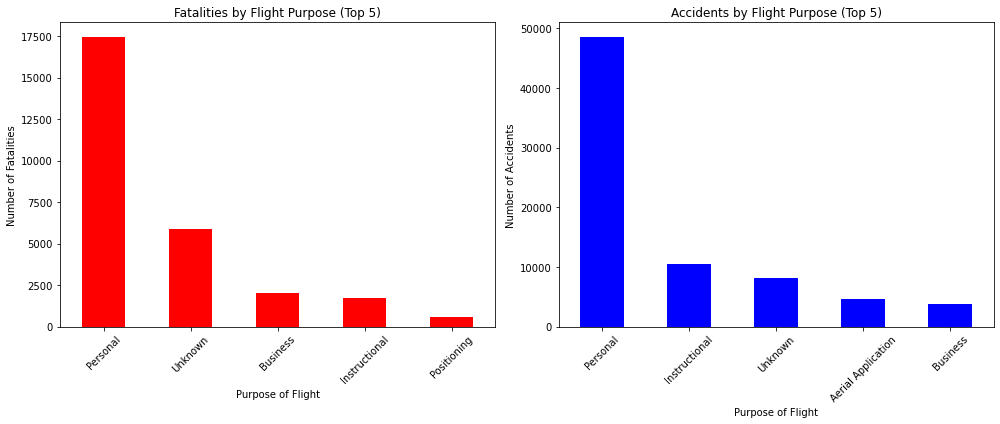

In [35]:
# We will progress with the evalaution of our Second problem statement I.E:

(""'**Assessing Accident Risk by Flight Purpose**""')

#We will plot a bar graph of the relationship between
#1. The Number of Accident against the purpose of the Flight
#2. The Number of Fatalities against the purpose of the Flight

#We will work the USA country Data Frame.

# Get the top 5 flight purposes with the most accidents
top_5_purposes_accidents = df_us['Flight_Purpose'].value_counts().nlargest(5).sort_values(ascending=False)

# Get the top 5 flight purposes with the most fatalities
top_5_purposes_fatalities = df_us.groupby('Flight_Purpose')['Fatality'].sum().nlargest(5).sort_values(ascending=False)

# Create figure with 2 side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Number of Fatalities by Flight Purpose (Left)
top_5_purposes_fatalities.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Fatalities by Flight Purpose (Top 5)')
axes[0].set_xlabel('Purpose of Flight')
axes[0].set_ylabel('Number of Fatalities')
axes[0].tick_params(axis='x', rotation=45)

# Plot Number of Accidents by Flight Purpose (Right)
top_5_purposes_accidents.plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Accidents by Flight Purpose (Top 5)')
axes[1].set_xlabel('Purpose of Flight')
axes[1].set_ylabel('Number of Accidents')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Comments:
# 1. personal flights forms majority of aviation accidents at approximately 48,000/- Accidents this forms approximately
#70% of the sampled 5 purposes
#2. Personal Flights Account to Majority of fatalities, this can be attributed to lower security controls and standards
#2. Business purpose flight have a lower risk.

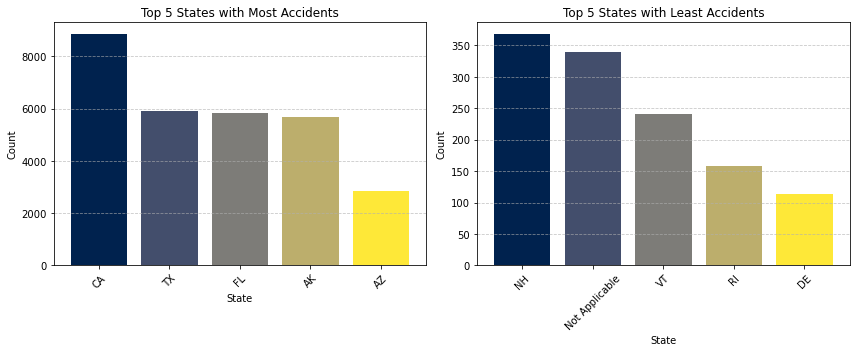

In [36]:
# The Third problem statement i.e:

(""'**Geographical Analysis of Aviation Accidents in the U.S.A**""')

#We will plot a graph of the relationship between the Number of Accident against the
#1.Top 5 states with most Accidents in the USA
#2.Top 5 states with the least Accidents in the USA

# Get the top 5 states with most accidents
top_5_states = df_us['State'].value_counts().head(5)

# Get the top 5 states with least accidents
bottom_5_states = df_us['State'].value_counts().tail(5)

# Set up the color maps
cmap_top = cm.get_cmap('cividis', len(top_5_states))
colors_top = cmap_top(range(len(top_5_states)))

cmap_bottom = cm.get_cmap('cividis', len(bottom_5_states))
colors_bottom = cmap_bottom(range(len(bottom_5_states)))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side by side

# Plot top 5 states with most accidents
axes[0].bar(top_5_states.index, top_5_states.values, color=colors_top)
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 5 States with Most Accidents')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot top 5 states with least accidents
axes[1].bar(bottom_5_states.index, bottom_5_states.values, color=colors_bottom)
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 5 States with Least Accidents')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#Comments:
#1. California, Texas and Florida Account for Majority Accidents experienced in the Usa
#2.Vermont, Rhode Island and Delaware states have minimal Aviation Accidents Recorded.


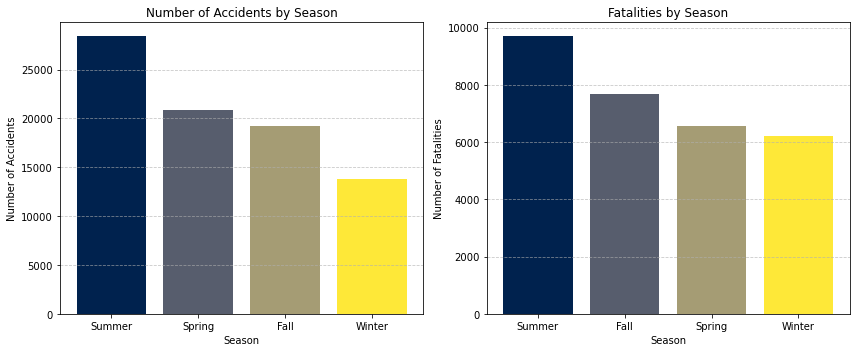

In [37]:
# Lets progress with the Analysis of the fourth problem statement i.e

(""'**Seasonal Impact on Aviation Accidents and Revenue Optimization**""')

#We will plot a graph of the relationship between the Number of Accident and Seasons and Make Inference for USA Dataset
#We will plot two graphs side by side
#1.Number of Accidents Against the season
#2.Number of Fatalities Against the season.


# Group by season and get number of accidents
seasonal_accidents = df_us['Season'].value_counts().sort_values(ascending=False)

# Group by season and sum fatalities
seasonal_fatalities = df_us.groupby('Season')['Fatality'].sum().sort_values(ascending=False)

# Define colormap
cmap = cm.get_cmap('cividis', len(seasonal_accidents))
colors_accidents = cmap(range(len(seasonal_accidents)))
colors_fatalities = cmap(range(len(seasonal_fatalities)))

# Create figure with 2 side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Number of Accidents by Season
axes[0].bar(seasonal_accidents.index, seasonal_accidents.values, color=colors_accidents)
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Number of Accidents by Season')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Fatalities by Season
axes[1].bar(seasonal_fatalities.index, seasonal_fatalities.values, color=colors_fatalities)
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Fatalities')
axes[1].set_title('Fatalities by Season')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Comments:

#1. Most Number of Accident and Most fatalities all happen in the Summer season, with an accident range of 28,000
#with a corresonding fatality at 9700 which gives a fatality rate of around 35 percent of the accident numbers
#considering that summer is normally clear it can be attributed to laxity from the pilots end.

#2.Winter experiences the least number of Accidents and Fatalties, this can infer that fewer people travel over the winter 


## 6. Conclusion and  Recommendations

**Conclusion and Recommendations**

**1. Evaluating Aircraft Safety Based on Make and Model**
Cessna aircraft models account for the majority of aviation accidents and fatalities, while MD Helicopters, Piccard, and Mooney M-20K have demonstrated strong safety records, recording the fewest accidents and fatalities. This informs a  decision to avoid purchase of Cessna Make and Model because of high inherent risk.

**Possible Reasons**
 i.	High Usage of Cessna Aircraft – Cessna planes, particularly models like the 152 and 172, are widely used for flight training and personal aviation, leading to a higher exposure to accidents.
ii.	Pilot Experience Levels – Many Cessna aircraft are flown by student and private pilots, who may have less experience handling emergency situations.
iii.	Operational Frequency – The sheer number of Cessna aircraft in use increases the likelihood of incidents compared to less common models.

**Recommendations:**
•	Enhanced Pilot Training: Strengthen training programs for student and private pilots, focusing on emergency procedures, situational awareness, and risk management.
•	Safety Technology Integration: Encourage the adoption of advanced safety systems, such as collision avoidance technology and real-time weather monitoring, in frequently used aircraft.
•	Regular Maintenance and Inspections: Ensure strict adherence to maintenance schedules to reduce mechanical failures that could lead to accidents.
•	Promoting Safer Aircraft Options: Conduct further research on aircraft models with strong safety records and explore ways to incorporate their safety features into widely used planes.

**2. Assessing Accident Risk by Flight Purpose**
A significant portion of aviation accidents is attributed to personal flight operations. Unlike Business and Instructional flights, personal flights often involve pilots with varying levels of experience and training, which may contribute to a higher likelihood of human errors. Additionally, these flights may have less stringent regulatory oversight, leading to inconsistent adherence to safety protocols.

To address this issue, it is crucial to enhance safety awareness among private pilots through Stronger Training Requirements, Enhanced Safety Regulations and Risk Awareness Campaigns:

**3. Geographical Analysis of Aviation Accidents in the U.S.A**
California, Texas, and Florida account for the majority of aviation accidents in the United States, while Vermont, Rhode Island, and Delaware have recorded the fewest incidents.

**Possible Reasons**
    i.	High Air Traffic Volume – These states have some of the busiest airspaces in the country, with numerous commercial, private, and training flights operating daily.
    ii.	Diverse and Challenging Weather Conditions – Frequent thunderstorms, hurricanes, and fog, especially in Florida and Texas, can contribute to higher accident rates.
    iii.	Large Number of Flight Training Schools – States like Florida and Texas are home to many flight schools, increasing the number of student pilots and training-related incidents.
    iv.	Geographical and Economic Factors – These states have vast territories with significant aviation activity, including private, agricultural, and business flights.

**Recommendations**
•	Enhanced Safety Regulations: Implement stricter oversight in high-accident states, ensuring compliance with safety protocols for both private and commercial flights.
•	Targeted Pilot Training Programs: Focus on risk awareness and emergency preparedness, particularly in areas with high air traffic and complex weather patterns.
•	Improved Air Traffic Management: Invest in air traffic control infrastructure to better handle the large volume of flights and reduce mid-air conflicts.


**4. Seasonal Impact on Aviation Accidents and Revenue Optimization**
Large proprtion of Accidents and Fatalities happended in the summer when the weather is favorable and clear, this may be due to laxity from the pilots end.  To mitigate this, it is essential to upskill the pilots through targeted training and awareness campaigns which emphasize on safety.




 

In [38]:
#Save the DataFrame to a CSV file
df_us.to_csv('USA_Aviation_Data_cleaned.csv', index=False)